In [440]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import re
from IPython.display import IFrame
from IPython.display import display

In [441]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
%matplotlib inline

In [442]:
df = pd.read_pickle('/Users/andrewpeters/GitHub/fpl/data/interim/df.pkl')

In [443]:
xg_df = pd.read_pickle('/Users/andrewpeters/GitHub/understat/match_level_player_stats.pkl')

In [444]:
fpl_replace_dict = {}

In [445]:
fpl_replace_dict['Bojan_Krkic'] = 'Bojan_Krkic Perez'
fpl_replace_dict['Ahmed El-Sayed_Hegazy'] = 'Ahmed El-Sayed_Hegazi'

In [446]:
with open('/Users/andrewpeters/GitHub/fpl/data/interim/understat_name_replace_dict.pkl', 'rb') as f:
    name_replace_dict = pickle.load(f)

In [447]:
xg_df.player = xg_df.player.replace(to_replace = name_replace_dict)

In [448]:
#look at players from understat who are not showing up in the fpl data. Don't want to look at symmetric difference, because understat only has data for people who played

unmatched_names = [player for player in xg_df.player.unique() if player not in df.player.unique()]

In [449]:
no_results = []
multi_results = {}

mylist = df.player.unique()

for name in unmatched_names:
    r = re.compile(f'.*{name}*')
    results = list(filter(r.match, mylist))
    if len(results) == 1:
        name_replace_dict[name] = results[0]
        print(f'searched for {name}, and found {results[0]} as a replacement')
    elif len(results) > 1:
        multi_results[name] = results
    else:
        no_results.append(name)

In [450]:
mylist = df.player.unique()

still_no_results = []

for full_name in no_results:
    name = full_name.split('_')[-1]
    r = re.compile(f'.*{name}*')
    results = list(filter(r.match, mylist))
    if len(results) == 1:
        name_replace_dict[full_name] = results[0]
        print(f'searched for {name}, and found {results[0]} as a replacement')
    elif len(results) > 1:
        multi_results[full_name] = results
    else:
        still_no_results.append(name)

In [451]:
len(still_no_results)

12

In [452]:
len(multi_results)

1

In [453]:
for k,v in multi_results.items():
    try:
        name_replace_dict[k]
        continue
        #skip this player if they've already been added to the replacement dict
    except:
        team = xg_df[(xg_df.player == k)].tail(10)['home_team'].value_counts().index[0]
        print(f'{k}, {team}')
        for idx, name in enumerate(v):
            print(f'{idx}: {name}')
        inp = ''
        while not inp.isdigit():
            inp = input('Index of Correct Match: ')
            if inp == 'exit':
                break
            elif inp == 'skip':
                continue
            elif inp == 'g':
                query = f'https://www.google.com/search?igu=1&ei=&q={k}+epl+{team}'
                display(IFrame(query, width='100%', height=300))
        name_replace_dict[k] = v[int(inp)]
        print(f'Added {k} as {v[int(inp)]} \n')

In [454]:
xg_df.player = xg_df.player.replace(to_replace = name_replace_dict)

In [455]:
[player for player in xg_df.player.unique() if player not in df.player.unique()]

['Nolito',
 'John_O&#039;Shea',
 'Aiden_O&#039;Neill',
 'Alfred_N&#039;Diaye',
 'Zanka',
 'Chicharito',
 'Joselu',
 'Jack_O&#039;Connell',
 'Angelino',
 'Ralf_Fährmann',
 'Daniel_N&#039;Lundulu',
 'Shola_Shoretire',
 'Sidnei_Tavares']

In [456]:
with open('/Users/andrewpeters/GitHub/fpl/data/interim/understat_name_replace_dict.pkl', 'wb') as f:
    pickle.dump(name_replace_dict, f)

In [457]:
xg_df.player = xg_df.player.replace(to_replace = name_replace_dict)

In [458]:
drop_players = [player for player in xg_df.player.unique() if player not in df.player.unique()]

In [459]:
xg_df = xg_df[~xg_df.player.isin(drop_players)]

In [460]:
df['date'] = df.kickoff_time.dt.date

In [461]:
xg_df['date'] = xg_df.datetime.dt.date

In [462]:
merged_df = df.merge(xg_df, how = 'left', on = ['player', 'date'], suffixes = ('', '_understat')).sort_values(['player', 'date'])

In [463]:
merged_df = merged_df.drop_duplicates(subset=['player', 'date'])

<AxesSubplot:>

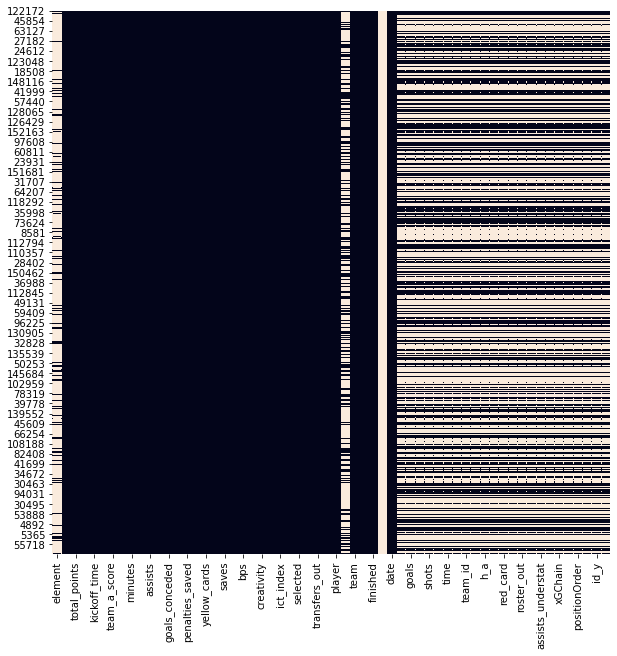

In [464]:
plt.figure(figsize=(10,10))
sns.heatmap(merged_df.isnull(), cbar=False)

<AxesSubplot:>

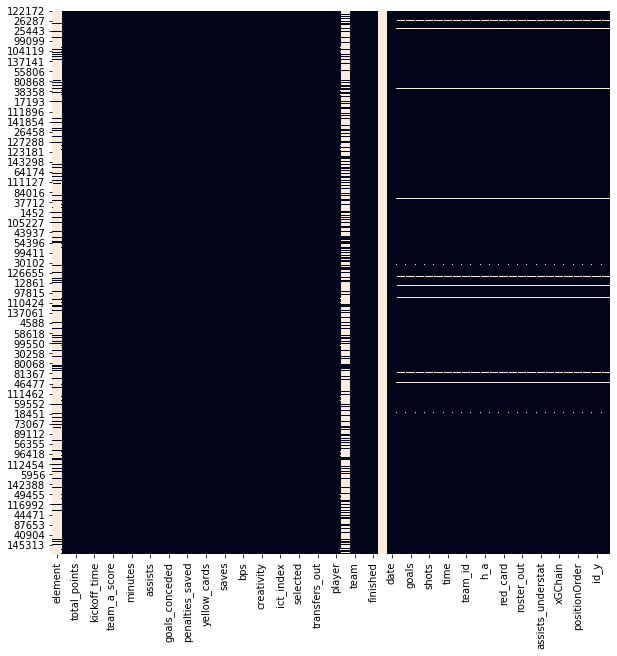

In [465]:
plt.figure(figsize=(10,10))
sns.heatmap(merged_df[merged_df['minutes'] > 10].isnull(), cbar=False)

In [466]:
merged_df.to_pickle('/Users/andrewpeters/GitHub/fpl/data/interim/01a-understat-merged-df.pkl')

# Further name replacements -- now saved in the name_replace_dict pickle

In [270]:
name_replace_dict['Bruno'] = 'Bruno_Saltor Grau'
name_replace_dict['Sidnei_Tavares'] = 'Sidnei_Tavares'

In [276]:
name_replace_dict['Thiago_Silva'] = 'Thiago_Thiago'


In [302]:
name_replace_dict['Fernandinho'] = 'Fernando_Luiz Rosa'
name_replace_dict['Jorginho'] = 'Jorge Luiz_Frello Filho'
name_replace_dict['Romain_Saiss'] = 'Romain_Saïss'
name_replace_dict['Fabinho'] = 'Fabio Henrique_Tavares'
name_replace_dict['Nicolas_Pepe'] = 'Nicolas_Pépé'
name_replace_dict['Tanguy_NDombele_Alvaro'] = 'Tanguy_Ndombele'
name_replace_dict['Dara_O&#039;Shea'] = "Dara_O'Shea"
name_replace_dict['Vitinha'] = 'Vitor_Ferreira'
name_replace_dict['Trézéguet'] = 'Mahmoud Ahmed_Ibrahim Hassan'
name_replace_dict['Raphinha'] = 'Raphael_Dias Belloli'
name_replace_dict['Martin_Odegaard'] = 'Martin_Ødegaard'